# Overview of the project


## Fetal Heart Rate Monitoring:-
* Use pattern recognition algorithms to analyze fetal heart rate patterns
* Detect early signs of fetal distress or cardiac abnormalities
* Compare against baseline measurements for personalized risk assessment

## Sources and Explaination

### Sources:-
https://www.kaggle.com/datasets/namishjindal4/cardiotocography-dataset

### Explaination:-

#### General Information:-
* Date: Date of the recording.

* S, E: Start and end times of the recording in seconds.

#### Signal Features:-
* LB: Baseline fetal heart rate (in bpm).

* AC: Number of accelerations per second.

* FM: Number of fetal movements per second.

* UC: Number of uterine contractions per second.

* ASTV: Percentage of time with abnormal short-term variability.

* MSTV: Mean value of short-term variability.

* ALTV: Percentage of time with abnormal long-term variability.

* MLTV: Mean value of long-term variability.

#### Histogram Features:-
* DL: Histogram width.

* DS: Histogram minimum value.

* DP: Histogram maximum value.

* Width: Histogram width (repeated/alternate naming).

* Min: Minimum histogram value.

* Max: Maximum histogram value.

* Nmax: Number of histogram peaks.

* Nzeros: Number of histogram zeros.

* Mode: Mode of the histogram.

* Mean: Mean of the histogram.

* Median: Median of the histogram.

* Variance: Variance of the histogram.

* Tendency: Histogram tendency (trend direction).

#### Atypical Pattern Flags (binary indicators from expert or algorithm):-
* A, B, C, D, E.1: algorithmic interpretations/flags.

* AD, DE, LD: Possibly acronyms for specific CTG patterns (Accelerative, Decelerative, Late Decelerations).

* FS: Fetal state flag.

* SUSP: Suspicious trace flag.

#### Target/Outcome:-
* CLASS: Classification label (e.g., 1–10 range, typically used for expert classification or training).

* NSP: Fetal state class (1 = Normal, 2 = Suspect, 3 = Pathological) — commonly used as the main label in supervised learning tasks.

# To use a GPU
we execute the below code to use a GPU

In [ ]:
# Import TensorFlow into colab
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("TF hub version:", hub.__version__)

# Check for GPU availability
print("GPU", "available (YESSSS!!!!!) " if tf.config.list_physical_devices("GPU") else "not available :( ")

TF version: 2.18.0
TF hub version: 0.16.1
GPU available (YESSSS!!!!!) 


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing Models
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

#Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score
from sklearn.metrics import RocCurveDisplay

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CTG_CSV.csv")

In [ ]:
df

,Date,S,E,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,C,D,E.1,AD,DE,LD,FS,SUSP,CLASS,NSP
0,01-12-1996,240.0,357.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,03-05-1996,5.0,632.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,03-05-1996,177.0,779.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,03-05-1996,411.0,1192.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,03-05-1996,533.0,1147.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,06-06-1998,1576.0,3049.0,140.0,1.0,0.0,9.0,78.0,0.4,27.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2125,06-06-1998,2796.0,3415.0,142.0,1.0,1.0,5.0,74.0,0.4,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data exploration

the goal here is to find out more about the data and become subject to matter export on the data

1. What questions are you trying to solve ?
2. What kind of data do we have and how do we treat different types ?
3. what's missing from the data and how do you deal with it ?
4. where are outliers and why do we need to take care of them ?
5. how can you add, change or remove features to get more out of your data ?

In [ ]:
df = df.drop("Date",axis = 1)
df

,S,E,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,...,C,D,E.1,AD,DE,LD,FS,SUSP,CLASS,NSP
0,240.0,357.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,5.0,632.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,177.0,779.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,411.0,1192.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,533.0,1147.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1576.0,3049.0,140.0,1.0,0.0,9.0,78.0,0.4,27.0,7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2125,2796.0,3415.0,142.0,1.0,1.0,5.0,74.0,0.4,36.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.drop("S",axis = 1)
df = df.drop("E",axis = 1)
df

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,C,D,E.1,AD,DE,LD,FS,SUSP,CLASS,NSP
0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,140.0,1.0,0.0,9.0,78.0,0.4,27.0,7.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2125,142.0,1.0,1.0,5.0,74.0,0.4,36.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


S and E are histogram-based summary values that don't provide unique information beyond other statistical features therefore they are dropped/removed from the original table

In [ ]:
df["NSP"].value_counts()

,count
NSP,
1.0,1655
2.0,295
3.0,176


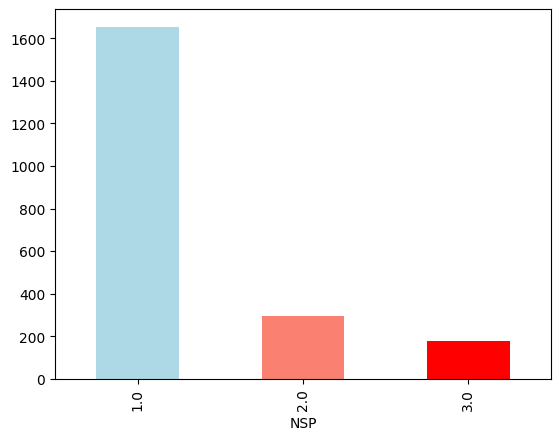

In [ ]:
df["NSP"].value_counts().plot(kind = "bar",color = ["lightblue","salmon","red"])
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2127 non-null   float64
 3   UC        2127 non-null   float64
 4   ASTV      2127 non-null   float64
 5   MSTV      2127 non-null   float64
 6   ALTV      2127 non-null   float64
 7   MLTV      2127 non-null   float64
 8   DL        2128 non-null   float64
 9   DS        2128 non-null   float64
 10  DP        2128 non-null   float64
 11  Width     2126 non-null   float64
 12  Min       2126 non-null   float64
 13  Max       2126 non-null   float64
 14  Nmax      2126 non-null   float64
 15  Nzeros    2126 non-null   float64
 16  Mode      2126 non-null   float64
 17  Mean      2126 non-null   float64
 18  Median    2126 non-null   float64
 19  Variance  2126 non-null   float64
 20  Tendency  2126 non-null   floa

In [ ]:
df.isna().sum()

,0
LB,3
AC,3
FM,2
UC,2
ASTV,2
MSTV,2
ALTV,2
MLTV,2
DL,1
DS,1


In [ ]:
df.dropna(inplace = True)
df

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,C,D,E.1,AD,DE,LD,FS,SUSP,CLASS,NSP
0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.0,0.0,6.0,79.0,0.2,25.0,7.2,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2122,140.0,1.0,0.0,9.0,78.0,0.4,22.0,7.1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2123,140.0,1.0,0.0,7.0,79.0,0.4,20.0,6.1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2124,140.0,1.0,0.0,9.0,78.0,0.4,27.0,7.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0


In [ ]:
df.describe()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,C,D,E.1,AD,DE,LD,FS,SUSP,CLASS,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,2.722484,7.241298,3.659925,46.990122,1.332785,9.84666,8.187629,1.570085,0.003293,...,0.024929,0.038100,0.033866,0.156162,0.118532,0.050329,0.032455,0.092662,4.509878,1.304327
std,9.840844,3.560850,37.125309,2.847094,17.192814,0.883241,18.39688,5.628247,2.499229,0.057300,...,0.155947,0.191482,0.180928,0.363094,0.323314,0.218675,0.177248,0.290027,3.026883,0.614377
min,106.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,126.000000,0.000000,0.000000,1.000000,32.000000,0.700000,0.00000,4.600000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
50%,133.000000,1.000000,0.000000,3.000000,49.000000,1.200000,0.00000,7.400000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000
75%,140.000000,4.000000,2.000000,5.000000,61.000000,1.700000,11.00000,10.800000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000
max,160.000000,26.000000,564.000000,23.000000,87.000000,7.000000,91.00000,50.700000,16.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,3.000000


In [ ]:
df

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,C,D,E.1,AD,DE,LD,FS,SUSP,CLASS,NSP
0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.0,0.0,6.0,79.0,0.2,25.0,7.2,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2122,140.0,1.0,0.0,9.0,78.0,0.4,22.0,7.1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2123,140.0,1.0,0.0,7.0,79.0,0.4,20.0,6.1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2124,140.0,1.0,0.0,9.0,78.0,0.4,27.0,7.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0


In [ ]:
df.NSP.value_counts()

,count
NSP,
1.0,1655
2.0,295
3.0,176


In [ ]:
df.corr()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,C,D,E.1,AD,DE,LD,FS,SUSP,CLASS,NSP
LB,1.000000,-0.077967,-0.033305,-0.127722,0.305570,-0.279607,0.285630,-0.032091,-0.155908,-0.053518,...,-0.062894,0.005591,0.158350,-0.130368,-0.030849,-0.122136,0.069885,0.283783,0.143001,0.148151
AC,-0.077967,1.000000,0.053956,0.212100,-0.197985,0.191378,-0.345162,-0.128901,-0.011350,-0.039341,...,-0.113805,0.328854,-0.116153,0.264657,-0.255090,-0.140998,-0.140062,-0.238009,-0.255205,-0.340394
FM,-0.033305,0.053956,1.000000,-0.036626,-0.116461,0.138061,-0.072214,0.021031,0.076283,-0.010328,...,-0.022823,0.058019,-0.024547,0.113454,0.001145,0.089162,-0.003765,-0.033851,0.077805,0.060366
UC,-0.127722,0.212100,-0.036626,1.000000,-0.079651,0.232687,-0.247513,-0.106590,0.339484,0.018405,...,-0.097485,-0.029741,-0.026050,0.243954,0.084710,0.113672,-0.205653,-0.251330,-0.073465,-0.163295
ASTV,0.305570,-0.197985,-0.116461,-0.079651,1.000000,-0.430705,0.459413,-0.315105,-0.037040,0.033949,...,-0.142252,-0.113669,0.072269,-0.198840,-0.132195,0.137192,0.308643,0.364282,0.284580,0.471191
MSTV,-0.279607,0.191378,0.138061,0.232687,-0.430705,1.000000,-0.470259,0.073892,0.516901,0.034130,...,0.021396,0.096120,-0.126216,0.284401,0.259776,0.275303,-0.210904,-0.329125,0.077214,-0.103382
ALTV,0.285630,-0.345162,-0.072214,-0.247513,0.459413,-0.470259,1.000000,-0.171114,-0.266298,-0.030770,...,-0.074120,-0.106547,0.075927,-0.205648,-0.117518,-0.123011,0.478205,0.446388,0.303050,0.426146
MLTV,-0.032091,-0.128901,0.021031,-0.106590,-0.315105,0.073892,-0.171114,1.000000,-0.251442,-0.037667,...,0.259315,-0.094099,0.045238,-0.082898,-0.022701,-0.225276,-0.104933,-0.044011,-0.228310,-0.226797
DL,-0.155908,-0.011350,0.076283,0.339484,-0.037040,0.516901,-0.266298,-0.251442,1.000000,0.121617,...,-0.090816,-0.112276,-0.108282,0.430801,0.446887,0.332372,-0.114025,-0.185229,0.395887,0.065328
DS,-0.053518,-0.039341,-0.010328,0.018405,0.033949,0.034130,-0.030770,-0.037667,0.121617,1.000000,...,-0.009190,-0.011439,-0.010761,-0.002107,-0.021077,0.212109,-0.010527,-0.018368,0.060861,0.131934


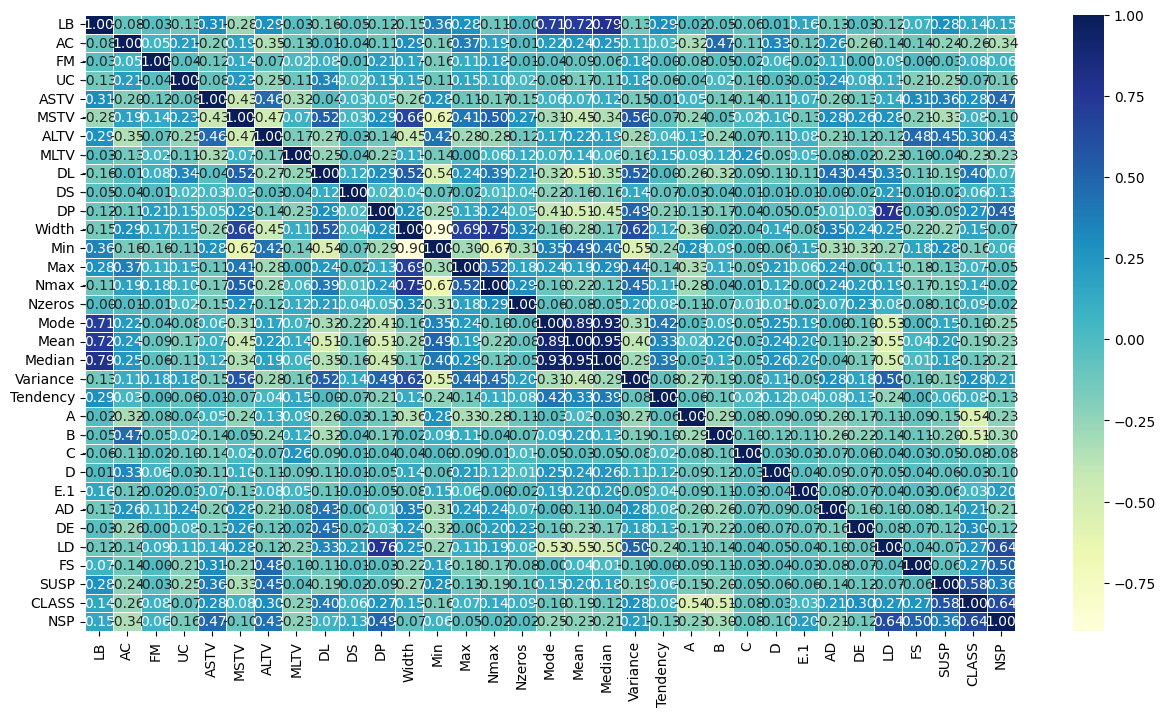

In [ ]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize = (15,8))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidth = 0.5,
                 fmt = ".2f",
                 cmap = "YlGnBu")
plt.show()

## Modeling

We are going to try 2 models which are the best for prediction for the given model,

* RandomForestClassifier
* catboost

In [ ]:
# Making a dictionary of models
models = {"RandomForestClassifier":RandomForestClassifier(),
          "CatBoost":CatBoostClassifier()}

# Splitting the data into train and test sets
x = df.drop("NSP",axis = 1)
y = df["NSP"]

# Setting the seed
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

# creating a function to run and score our models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    # setting seed
    np.random.seed(42)
    # Making a dictionary to store the various scores
    model_scores = {}
    #loop through the models
    for name,model in models.items():
        # fit the model to the data
        model.fit(x_train,y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test,y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models = models,
                             x_train = x_train,
                             x_test = x_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

Learning rate set to 0.081297
0:	learn: 0.9737834	total: 5.25ms	remaining: 5.25s
1:	learn: 0.8588671	total: 8.78ms	remaining: 4.38s
2:	learn: 0.7629089	total: 12.2ms	remaining: 4.04s
3:	learn: 0.6814923	total: 15.5ms	remaining: 3.85s
4:	learn: 0.6132044	total: 18.8ms	remaining: 3.74s
5:	learn: 0.5557699	total: 23.2ms	remaining: 3.84s
6:	learn: 0.5096392	total: 24.7ms	remaining: 3.51s
7:	learn: 0.4665786	total: 28.3ms	remaining: 3.51s
8:	learn: 0.4297440	total: 32ms	remaining: 3.52s
9:	learn: 0.3944705	total: 35.3ms	remaining: 3.5s
10:	learn: 0.3640162	total: 38.7ms	remaining: 3.48s
11:	learn: 0.3364262	total: 42ms	remaining: 3.46s
12:	learn: 0.3119689	total: 45.6ms	remaining: 3.46s
13:	learn: 0.2893308	total: 49ms	remaining: 3.45s
14:	learn: 0.2704160	total: 52.7ms	remaining: 3.46s
15:	learn: 0.2509935	total: 56ms	remaining: 3.44s
16:	learn: 0.2342399	total: 59.6ms	remaining: 3.45s
17:	learn: 0.2187172	total: 63.1ms	remaining: 3.44s
18:	learn: 0.2054706	total: 66.5ms	remaining: 3.43s
1

{'RandomForestClassifier': 0.9859154929577465,
 'CatBoost': np.float64(0.9859154929577465)}

We see that from the above output both RandomForestClassifier and Catboost have the same score, therefore we can use either of the models.

the output of both models:-
* RandomForestClassifier: 0.9859154929577465
* CatBoost: 0.9859154929577465

# Model comparision

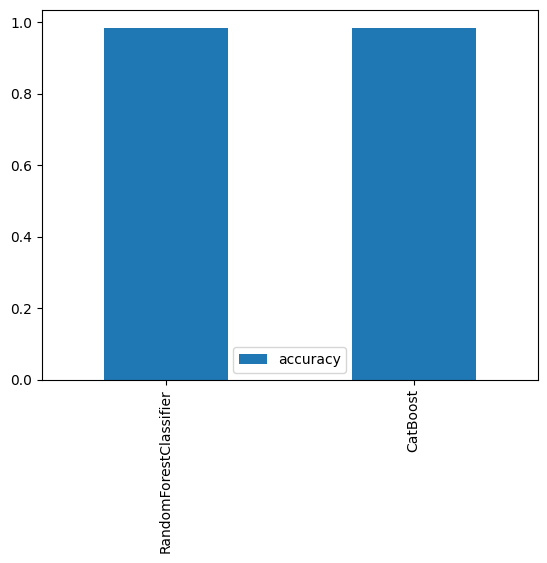

In [ ]:
model_compare = pd.DataFrame(model_scores,index = ["accuracy"])
model_compare.T.plot.bar()
plt.show()

### Let's look at the following:
1. Hyperparameter Tuning
2. Feature Importance
3. Confusion Matrix
4. Cross-validation
5. Precision
6. Recall
7. F1 score
8. Classification Report
9. Roc curve
10. Area under the curve (AUC)

# Let's try the above steps on RandomForestClassifier and CatBoost

In [ ]:
# creating a RandomForestClassifier grid to find the best parameters
rf_grid = {
    'n_estimators': [100, 200, 300],           # Number of trees
    'max_depth': [None, 10, 20],               # Tree depth
    'min_samples_split': [5, 10],              # Min samples to split a node
    'min_samples_leaf': [2, 4],                # Min samples at a leaf
    'max_features': ['sqrt', 'log2', None],    # Number of features to consider
    }
# creating a CatBoost grid to find the best parameters
cb_grid = {
    'iterations': [100, 200],          # Number of boosting rounds
    'learning_rate': [0.05, 0.1],           # Step size
    'depth': [6, 8],                    # Depth of the trees
    'l2_leaf_reg': [5, 7],               # L2 regularization
    'border_count': [64, 128],              # Number of splits for numerical features
    }

In [ ]:
# Tuning RandomForestClassifier
# setting a seed
np.random.seed(42)

# Using GridSearchCV to find the best set of hyperparameters
gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid = rf_grid,
                     cv = 5,
                     verbose = True)
#fit the grid hyperparameter search model
gs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=True)

In [ ]:
gs_rf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

best parameters are:-

max_depth: None

max_features: 'sqrt'

min_samples_leaf: 2

min_samples_split: 5

n_estimators: 200

In [ ]:
gs_rf.score(x_test,y_test)

0.9859154929577465

In [ ]:
#Tuning CatBoost
#setting a seed
np.random.seed(42)

#to use a gpu
catboost_gpu = CatBoostClassifier(
    task_type='GPU',
    devices='0',          # Use first GPU
    verbose=0,            # Silent training (optional)
    random_state=42
)

#Using GridSearchCv to find the best set of parameters
gs_cb = GridSearchCV(catboost_gpu,
                     param_grid = cb_grid,
                     cv = 5,
                     verbose = True)
# fit the grid hyperparameter to search model
gs_cb.fit(x_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7cb058090b10>,
             param_grid={'border_count': [64, 128], 'depth': [6, 8],
                         'iterations': [100, 200], 'l2_leaf_reg': [5, 7],
                         'learning_rate': [0.05, 0.1]},
             verbose=True)

In [ ]:
gs_cb.best_params_

{'border_count': 64,
 'depth': 8,
 'iterations': 200,
 'l2_leaf_reg': 5,
 'learning_rate': 0.1}

catboost best parameters:-

border_count: 64

depth: 8

iterations: 200

l2_leaf_reg: 5

learning_rate: 0.1

In [ ]:
gs_cb.score(x_test,y_test)

np.float64(0.9835680751173709)

We see that the both the scores are almost equally but '**RandomForestClassifier**' model if slightly better so we will continue with it

## Evaluating our tuned machine learning classifier beyond accuracy,

* ROC curve and AUC curve
* confusion matrix
* Classification report
* Precision score
* Recall score
* F1 score

and it would be great if cross-validation was used where possible

to make comparisions and evaluate our trained model, first we need to make predictions

In [ ]:
# first making predictions with trained model
y_preds = gs_rf.predict(x_test)

In [ ]:
y_preds

array([1., 1., 1., 1., 1., 3., 1., 3., 2., 2., 1., 3., 1., 1., 1., 1., 1.,
       1., 2., 1., 1., 1., 3., 1., 1., 3., 3., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 3., 2., 2., 1., 2., 1., 1., 1., 1., 1., 3., 1., 1., 1.,
       1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 3., 2., 1., 2., 1.,
       1., 1., 1., 2., 1., 1., 3., 1., 2., 2., 1., 2., 1., 3., 1., 1., 2.,
       1., 1., 2., 1., 1., 3., 3., 3., 1., 1., 1., 3., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 2., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1.,
       1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1.,
       1., 3., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       2., 1., 1., 1., 1.

# ROC Curve

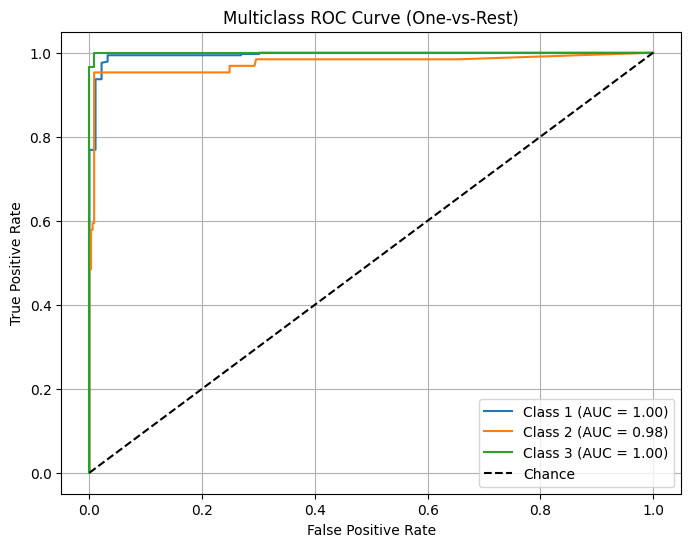

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output
classes = [1, 2, 3]
y_train_bin = label_binarize(y_train, classes=classes)
y_test_bin = label_binarize(y_test, classes=classes)

# Train a One-vs-Rest classifier using the best estimator
ovr_model = OneVsRestClassifier(gs_rf.best_estimator_)
ovr_model.fit(x_train, y_train_bin)

# Get the predicted probabilities
y_score = ovr_model.predict_proba(x_test)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f"Class {classes[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.title("Multiclass ROC Curve (One-vs-Rest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


# Confusion Matrix

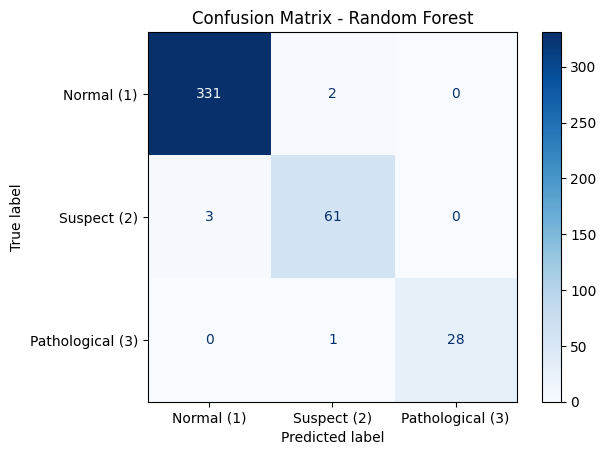

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get predictions from your best model
y_pred = gs_rf.best_estimator_.predict(x_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, 2, 3])  # Order matches classes

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Normal (1)", "Suspect (2)", "Pathological (3)"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Predict on test set using the best model
y_pred = gs_rf.best_estimator_.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Normal (1)", "Suspect (2)", "Pathological (3)"])

print("Classification Report:\n")
print(report)


Classification Report:

                  precision    recall  f1-score   support

      Normal (1)       0.99      0.99      0.99       333
     Suspect (2)       0.95      0.95      0.95        64
Pathological (3)       1.00      0.97      0.98        29

        accuracy                           0.99       426
       macro avg       0.98      0.97      0.98       426
    weighted avg       0.99      0.99      0.99       426

